In [1]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns # new library
import matplotlib.pyplot as plt
import numpy as np


## TOWER HAMLETS PM25 INCIDENT SCENARIO 0 && SCENARIO 2 && INDIDENT AVOIDED SCENARIO 2

In [2]:
file_path = '../data_unclean/health/pm25/tower-hamlets-pm25-xlsm-46.xls'
sheet_name = 'Incidence'

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.describe()
df.head()
df

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,149,1
1,0,2016,childhood asthma,06-17,250,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,399,1
...,...,...,...,...,...,...
5035,3,2050,stroke,06-17,1,0
5036,3,2050,stroke,18-64,19,0
5037,3,2050,stroke,65+,45,0
5038,3,2050,stroke,total,65,0


## SCENARIO 0 INCIDENCE FOR TOWER HAMLETS PM25

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\2333873288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidence_s0['Year'] = pd.to_datetime(df_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\2333873288.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


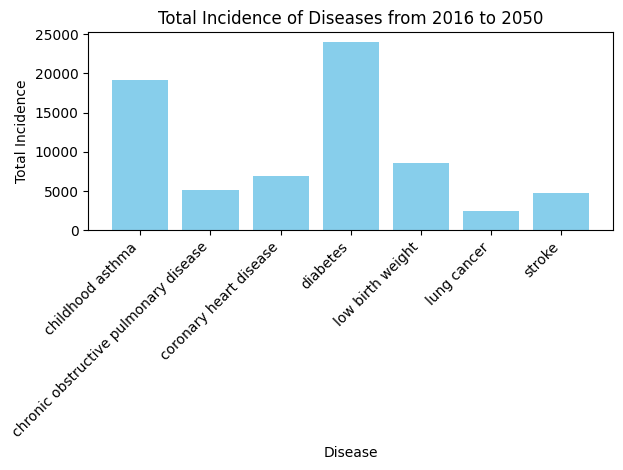

In [3]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
df_incidence_s0 = df[df['Scenario'] == 0]


df_incidence_s0['Year'] = pd.to_datetime(df_incidence_s0['Year'], format='%Y')
# NO2_incidence_s0.info()

# NO2_incidence_s0.head()

# NO2_incidence_s0.isnull().sum()

# diseases = NO2_incidence_s0['Disease'].unique()
# diseases

df_incidence_s0
grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

grouped_data
total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [4]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
grouped_data
total_incidence = grouped_data.sum(axis=1)
total_incidence


Disease
total    35531
dtype: int64

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\1051941988.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = df_incidence_s0[df_incidence_s0['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

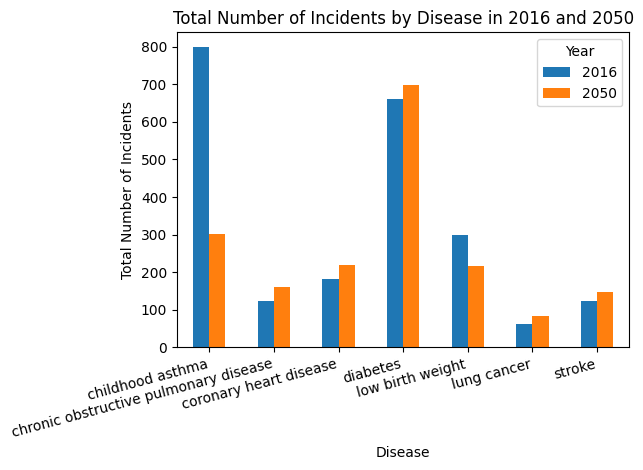

In [5]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = df_incidence_s0[df_incidence_s0['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## SCENARIO 2 PM25 'INCIDENCE' TOWER HAMLETS

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\249535918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidence_s2['Year'] = pd.to_datetime(df_incidence_s2['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\249535918.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


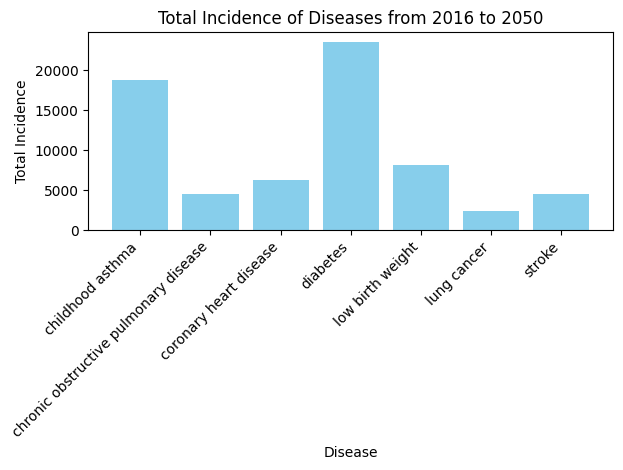

In [6]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
df_incidence_s2 = df[df['Scenario'] == 2]


df_incidence_s2['Year'] = pd.to_datetime(df_incidence_s2['Year'], format='%Y')
# NO2_incidence_s0.info()

# NO2_incidence_s0.head()

# NO2_incidence_s0.isnull().sum()

# diseases = NO2_incidence_s0['Disease'].unique()
# diseases


grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

grouped_data
total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\1678052501.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = df_incidence_s2[df_incidence_s2['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

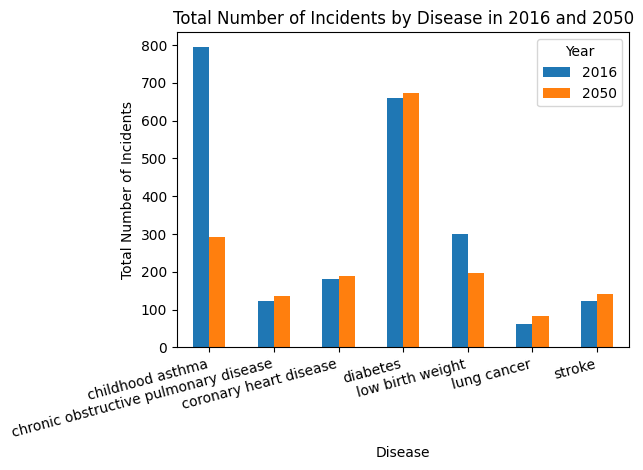

In [7]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE SCENARIO 2

df_selected_years = df_incidence_s2[df_incidence_s2['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [8]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
grouped_data
total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    34208
dtype: int64

## INCIDENCE AVOIDED MERGED FILES FOR TOWER HAMLETS PM25

In [9]:
file_path = '../data_unclean/health/pm25/tower-hamlets-pm25-xlsm-46.xls'

sheet_name = 'Incidence Cases Avoided'

df_avoided = pd.read_excel(file_path, sheet_name=sheet_name)


## SCENARIO 2 PM25 'INCIDENCE AVOIDED' FOR TOWER HAMLETS

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\167379106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_avoided_s2['Year'] = pd.to_datetime(df_avoided['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\167379106.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


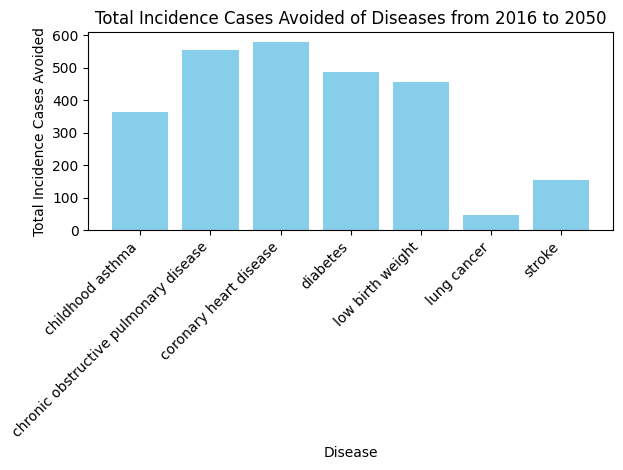

In [10]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

# london_NO2_avoided

# Total number for each disease by age from 2016-2050 INCIDENCE
PM25_avoided_s2 = df_avoided[df_avoided['Scenario'] == 2]
PM25_avoided_s2['Year'] = pd.to_datetime(df_avoided['Year'], format='%Y')
PM25_avoided_s2
# NO2_avoided_s0.info()
# NO2_avoided_s0.head()
# NO2_avoided_s0.isnull().sum()
# diseases = NO2_avoided_s0['Disease'].unique()
# diseases
# NO2_avoided_s0.isna().sum()
# NO2_avoided_s0.keys()

# NO2_avoided_s0
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

grouped_avoided
total_incidence_per_disease = grouped_avoided.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()





In [11]:
# TOTAL ALL DISEASES
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1323
dtype: int64

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\637791460.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_avoided_s2[PM25_avoided_s2['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

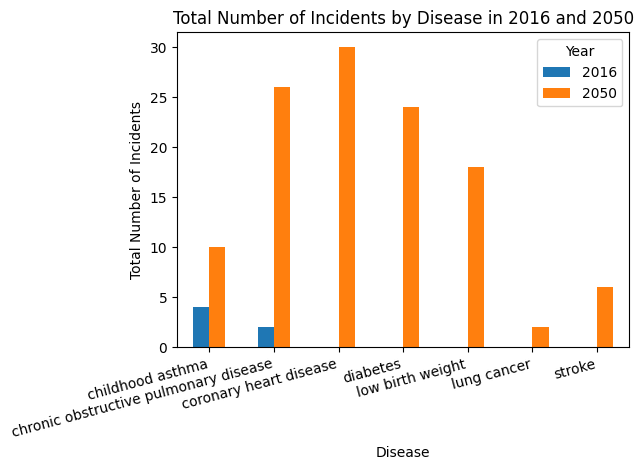

In [12]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE AVOIDED

df_selected_years = PM25_avoided_s2[PM25_avoided_s2['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## PERCENTAGE PER DISEASE DECREASE/INCREASE. COMPARE SCENARIO 0 AND 2 FOR NO2

In [13]:
# i need totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = df[df['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
PM25_incidence_s0
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = df[df['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
childhood asthma                         18794
chronic obstructive pulmonary disease     4570
coronary heart disease                    6326
diabetes                                 23526
low birth weight                          8168
lung cancer                               2450
stroke                                    4582
dtype: int64 Disease
childhood asthma                         19158
chronic obstructive pulmonary disease     5126
coronary heart disease                    6906
diabetes                                 24012
low birth weight                          8624
lung cancer                               2498
stroke                                    4738
dtype: int64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\4150356970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\4150356970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


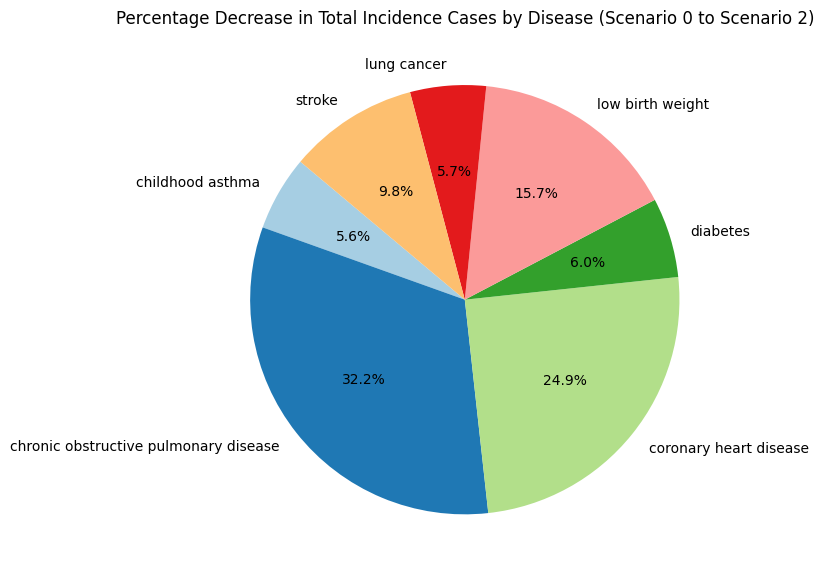

In [14]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

# # Plotting the pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(positive_change, labels=positive_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# plt.title('Percentage Increase in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()


In [15]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)


Absolute Change in Total Incidence Cases for Each Disease:
Disease
childhood asthma                        -364
chronic obstructive pulmonary disease   -556
coronary heart disease                  -580
diabetes                                -486
low birth weight                        -456
lung cancer                              -48
stroke                                  -156
dtype: int64


## TOTALS ASTHMAS, DEMENTIA, LUNG CANCER,  NO2, DIFFERENCE BETWEEN 0 AND 2 SCENARIO

In [16]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['childhood asthma', 'coronary heart disease', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease)


Total Number of Decrease for Selected Diseases:
-992


## PERCENTAGE ALL DIseases DECREASE. COMPARE SCENARIO 0 AND 2 FOR NO2

Disease
total    34208
dtype: int64 Disease
total    35531
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.723509
dtype: float64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\1834903153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_30084\1834903153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


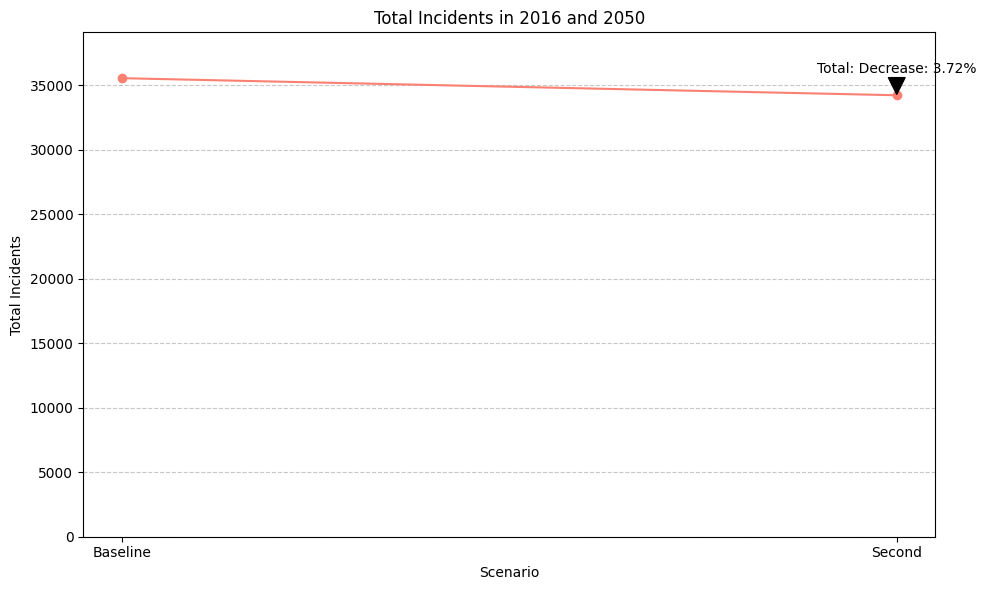

In [17]:
# i need totals for all disease from 2016-2050 for scenario 0
PM25_incidence_s0 = df[df['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals for all disease from 2016-2050 for scenario 2
PM25_incidence_s2 = df[df['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()